#  Zomato Data Analysis

## To do
Breakdown of this notebook:

    Loading the dataset: Load the data and import the libraries.
    Data Cleaning:
        Deleting redundant columns.
        Renaming the columns.
        Dropping duplicates.
        Cleaning individual columns.
        Remove the NaN values from the dataset
        Some Transformations
    Regression Analysis(Not yet done coz i dont know what to predict or classify ) 
        Linear Regression
        Decision Tree Regression
        Random Forest Regression
        
    Data Visualization: Using plots to find relations between the features.
        Restaurants delivering Online or not
        Restaurants allowing table booking or not
        Table booking Rate vs Rate
        Best Location
        Relation between Location and Rating
        Restaurant Type
        Gaussian Rest type and Rating (what's Gaussin Rest)
        Types of Services
        Relation between Type and Rating
        Cost of Restuarant
        No. of restaurants in a Location
        Restaurant type
        Most famous restaurant chains in Bengaluru (not yet done)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


###  Loading Dataset

In [2]:
df = pd.read_csv("../zomato.csv")

## Data Cleaning

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Deleting Redundant columns

removing dish liked column as it contains more null values

In [5]:
df.drop(columns =['url','address','phone','dish_liked'],inplace = True )

### Renaming the columns

In [6]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.rename({"approx_cost(for two people)":"expenses","listed_in(type)":"Type","listed_in(city)":"City"},axis=1,inplace = True)

In [8]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'expenses', 'reviews_list', 'menu_item',
       'Type', 'City'],
      dtype='object')

### Droping duplicates

In [9]:
df.duplicated().sum()

63

In [10]:
df.drop_duplicates(inplace = True)

### Removing NAN Value

In [11]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            7760
votes              0
location          21
rest_type        227
cuisines          45
expenses         345
reviews_list       0
menu_item          0
Type               0
City               0
dtype: int64

In [12]:
df.dropna(how='any',inplace = True)

### Cleaning Individual Columns

### Applying Transformations

In [13]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
expenses        object
reviews_list    object
menu_item       object
Type            object
City            object
dtype: object

In [14]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df = df[df.rate!="NEW"]
df = df[df.rate!="-"].reset_index(drop=True)

In [16]:
df.rate = df.rate.str.split('/').str[0]
df.rate = df.rate.astype('float64')

In [17]:
df.expenses.unique

<bound method Series.unique of 0          800
1          800
2          800
3          300
4          600
         ...  
41221      800
41222      800
41223    1,500
41224    2,500
41225    1,500
Name: expenses, Length: 41226, dtype: object>

In [18]:
df.expenses = df.expenses.str.replace(",","")
df.expenses = df.expenses.astype('int')

In [19]:
df.online_order.replace({'Yes':True,"No":False},inplace = True)
df.book_table.replace({'Yes':True,"No":False},inplace = True)

In [20]:
df.dtypes

name             object
online_order       bool
book_table         bool
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
expenses          int32
reviews_list     object
menu_item        object
Type             object
City             object
dtype: object

# Data Visualization

In [21]:
df.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,expenses,reviews_list,menu_item,Type,City
30659,Church Street Social,True,False,4.3,7568,Church Street,Lounge,"American, North Indian, Chinese, Finger Food, ...",1500,"[('Rated 5.0', 'RATED\n Excellent service. Go...","['Chilli Paneer Black Pepper China Box', 'Chil...",Dine-out,Lavelle Road
28032,Appana Restaurant,True,False,3.5,12,BTM,Quick Bites,North Indian,300,"[('Rated 5.0', 'RATED\n Best place for commut...",[],Delivery,Koramangala 7th Block
14532,Bhaiya Ji Food Court,False,False,3.0,16,Ulsoor,Quick Bites,"North Indian, Street Food",150,"[('Rated 5.0', ""RATED\n Nice good food and se...",[],Delivery,Indiranagar
30802,Swathi Deluxe Restaurant,True,False,2.9,75,Shanti Nagar,Casual Dining,North Indian,500,"[('Rated 5.0', 'RATED\n Quick delivery and th...","['Veg Biryani', 'Chicken Biryani', 'Veg Meals'...",Dine-out,Lavelle Road
19297,Alibaba Cafe and Restaurant,False,False,2.9,56,Kalyan Nagar,Casual Dining,"Arabian, Middle Eastern",700,"[('Rated 1.0', ""RATED\n I had a plastic cover...",[],Delivery,Kalyan Nagar


### Univariate Analysis

Univarite analysis of online order and online booking columns to better analyze the data

<AxesSubplot:xlabel='book_table', ylabel='count'>

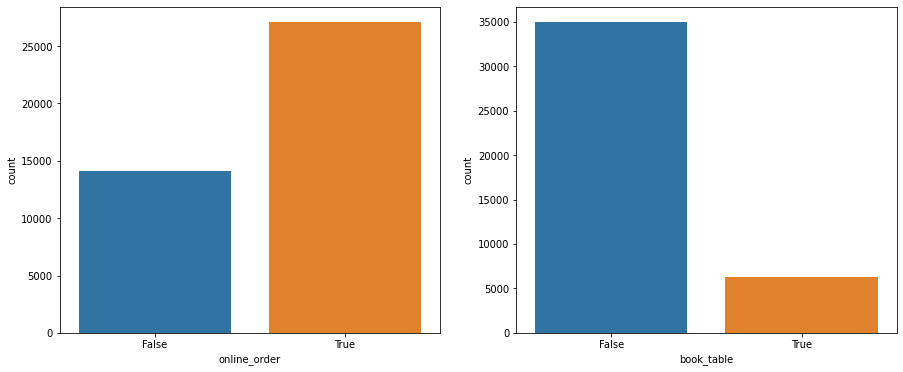

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x=df['online_order'])
plt.subplot(1,2,2)
sns.countplot(x=df['book_table'])

<AxesSubplot:xlabel='rate'>

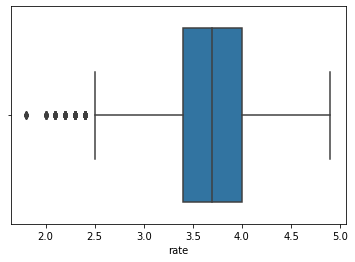

In [23]:
sns.boxplot(x=df['rate'])

<AxesSubplot:xlabel='rate', ylabel='Count'>

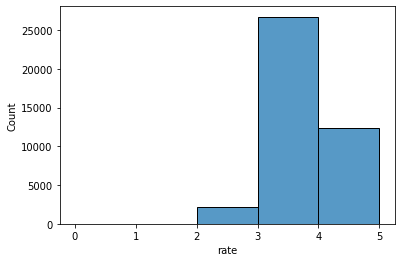

In [24]:
sns.histplot(x=df['rate'],binwidth=1,binrange=(0,5))

Most of the restau come under 3-4 ratings range

#### Good Location

Selecting the location as good location if it has more thn 500 restaurants 

In [25]:
a=pd.Series(df.location.value_counts())
ans = [i for i,j in zip(a.index,a.values) if j>500]
ans

['BTM',
 'Koramangala 5th Block',
 'HSR',
 'Indiranagar',
 'JP Nagar',
 'Jayanagar',
 'Whitefield',
 'Marathahalli',
 'Bannerghatta Road',
 'Koramangala 7th Block',
 'Koramangala 6th Block',
 'Brigade Road',
 'Bellandur',
 'Sarjapur Road',
 'Koramangala 1st Block',
 'Ulsoor',
 'Koramangala 4th Block',
 'Electronic City',
 'MG Road',
 'Banashankari',
 'Kalyan Nagar',
 'Malleshwaram',
 'Richmond Road',
 'Residency Road',
 'Basavanagudi',
 'Frazer Town',
 'Church Street',
 'Brookefield',
 'New BEL Road']

####  Types 

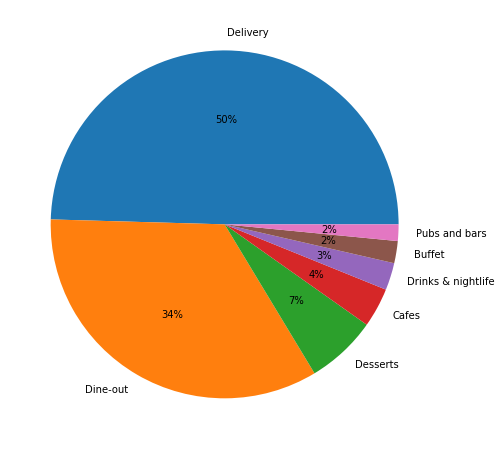

In [26]:
plt.figure(figsize=(8,8))
labels = df.Type.value_counts().index
plt.pie(df.Type.value_counts(),labels =labels,autopct='%.0f%%',)
plt.show()

Most of the restaurants are of Delivery and Dine Out type 

####  Restaurant types

In [27]:
df.rest_type.nunique()

87

In [28]:
df.rest_type.value_counts()>500

Quick Bites                   True
Casual Dining                 True
Cafe                          True
Dessert Parlor                True
Delivery                      True
                             ...  
Food Court, Beverage Shop    False
Cafe, Food Court             False
Dessert Parlor, Kiosk        False
Bakery, Beverage Shop        False
Quick Bites, Kiosk           False
Name: rest_type, Length: 87, dtype: bool

####  Dealing with the expenses 

<AxesSubplot:xlabel='expenses', ylabel='Count'>

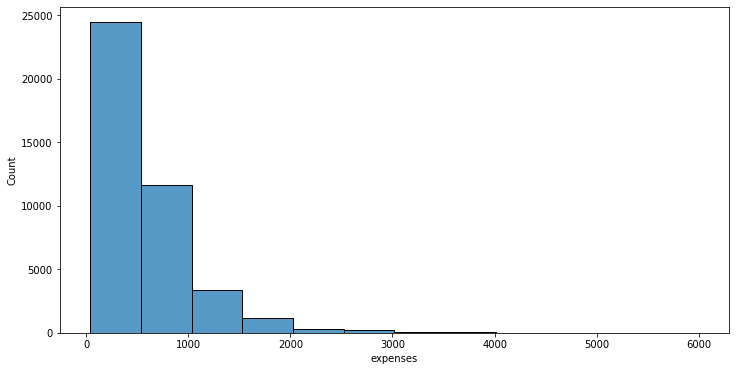

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df.expenses,bins=12)

Most of the Restaurant are for middle class families according to dataset ,not by my analysis

In [30]:
len(df[df.expenses<1000])/len(df)

0.8388395672633775

Again not me , the data is saying 83 percent people or 83 percent of Restaurant are for people who want to have a food for 2 people under 1000 Rs

In [31]:
df.sort_values('expenses',ascending=False)[['expenses','location']].head(14)

,expenses,location
15114,6000,Old Airport Road
36363,6000,Old Airport Road
32048,5000,Sankey Road
33520,4500,Marathahalli
33105,4500,Marathahalli
32044,4100,Sankey Road
31310,4100,Sankey Road
29903,4100,Sankey Road
31069,4100,Sankey Road
34533,4000,Residency Road


If you think you are super rich to afford take orders in these place or just take orders in any normal restraunt and donate the rest to me or someone else

In [32]:
df.loc[df.expenses>2000]['location'].value_counts()

MG Road                       147
Lavelle Road                   79
Ulsoor                         75
Richmond Road                  47
Residency Road                 47
Race Course Road               25
Whitefield                     25
Old Airport Road               22
Koramangala 6th Block          19
Marathahalli                   16
Infantry Road                  16
Sankey Road                    14
St. Marks Road                 12
Koramangala 5th Block          10
Vasanth Nagar                   9
Seshadripuram                   9
Malleshwaram                    8
Electronic City                 8
Indiranagar                     8
Domlur                          6
Cunningham Road                 6
Basavanagudi                    6
ITPL Main Road, Whitefield      3
Name: location, dtype: int64

In [33]:
df.loc[df.expenses>2000]['City'].value_counts()

Church Street            90
Lavelle Road             87
Brigade Road             83
MG Road                  82
Residency Road           77
Indiranagar              51
Malleshwaram             24
Whitefield               20
Frazer Town              17
Old Airport Road         16
Koramangala 4th Block     9
Marathahalli              9
Koramangala 5th Block     8
Electronic City           8
Koramangala 7th Block     8
Brookefield               8
Koramangala 6th Block     6
Sarjapur Road             4
Rajajinagar               4
Bellandur                 3
Basavanagudi              2
BTM                       1
Name: City, dtype: int64

Place you should visit if you are broke and also have a partner because its is for cost for 2 people , if you are alone aka single visit every place coz "you only live once" (YOLO)

In [34]:
df.loc[df.expenses>500]['City'].value_counts()

Koramangala 7th Block    934
BTM                      929
Koramangala 4th Block    920
Koramangala 5th Block    887
Church Street            853
Koramangala 6th Block    833
Brigade Road             828
MG Road                  823
Lavelle Road             788
Indiranagar              726
Residency Road           721
Jayanagar                657
JP Nagar                 522
Whitefield               498
Old Airport Road         493
HSR                      472
Marathahalli             446
Brookefield              435
Frazer Town              406
Kalyan Nagar             391
Sarjapur Road            383
Kammanahalli             380
Bellandur                379
Bannerghatta Road        378
Malleshwaram             372
Basavanagudi             357
Electronic City          295
Rajajinagar              283
Banashankari             206
New BEL Road             194
Name: City, dtype: int64

### Bivariate Analysis

#### Relation between Location and Rating

In [35]:
df1 =  pd.Series(df.groupby("location")['rate'].mean())
df1.sort_values(ascending=False)

location
Lavelle Road             4.141545
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.006925
Church Street            3.992125
                           ...   
Rammurthy Nagar          3.346154
North Bangalore          3.340000
Peenya                   3.200000
Bommanahalli             3.190972
Old Madras Road          3.181818
Name: rate, Length: 92, dtype: float64

#### online order and book table vs rating

In [36]:
print(df.groupby(df['online_order'])['rate'].mean())
print(df.groupby(df['book_table'])['rate'].mean())

online_order
False    3.660023
True     3.724083
Name: rate, dtype: float64
book_table
False    3.622485
True     4.143742
Name: rate, dtype: float64


Text(0.5, 1.0, 'book table vs rating')

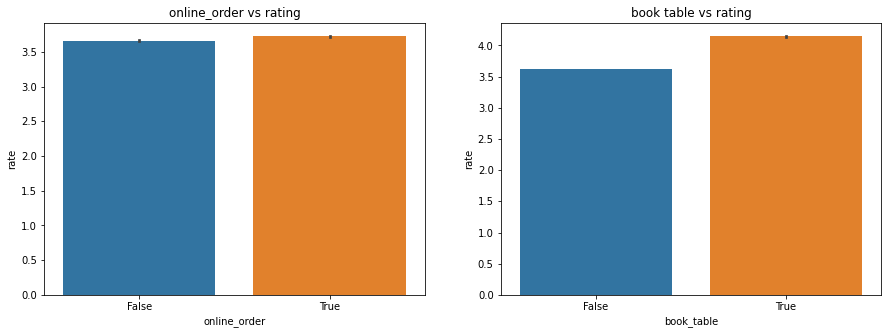

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y=df['rate'],x=df['online_order'])
plt.title("online_order vs rating")

plt.subplot(1,2,2)
sns.barplot(x=df['book_table'],y=df['rate'])
plt.title("book table vs rating")


Restaurants with book table has higher rating over the other 

### Multivariate Analysis

<AxesSubplot:xlabel='online_order', ylabel='rate'>

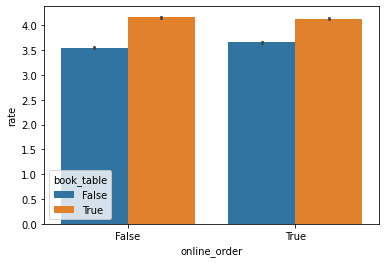

In [38]:
sns.barplot(x=df['online_order'],y=df['rate'],hue=df['book_table'])

<AxesSubplot:xlabel='book_table', ylabel='rate'>

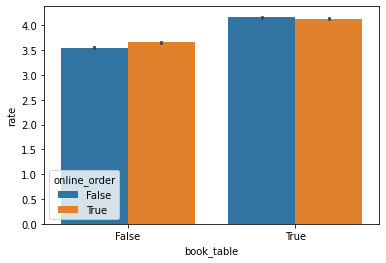

In [39]:
sns.barplot(x=df['book_table'],y=df['rate'],hue=df['online_order'])

Restaurants with table booking option has higher rating than restaurants without irrespective online order